## Dataset description:

In this project, we aim to build an API service backed by an NLP model that classifies textual elements of a product record (description, summary, etc.) into predefined categories.

The dataset consists of two main files:
1. `products.json`
2. `categories.json`

These files are based on the open e-commerce dataset from BestBuy.com. Extracted from https://bestbuyapis.github.io/api-documentation/

## Dataset Information

### Products JSON
The `products.json` file contains information about various products available on BestBuy.com. Here is an example entry for a single product:

```json
{
    "sku": 1004695,
    "name": "GoPro - Camera Mount Accessory Kit - Black",
    "type": "HardGood",
    "price": 19.99,
    "upc": "185323000309",
    "category": [
        {"id": "abcat0400000", "name": "Cameras & Camcorders"},
        {"id": "abcat0410022", "name": "Camcorder Accessories"},
        {"id": "pcmcat329700050009", "name": "Action Camcorder Accessories"},
        {"id": "pcmcat240500050057", "name": "Action Camcorder Mounts"},
        {"id": "pcmcat329700050020", "name": "Handlebar/Seatpost Mounts"}
    ],
    "shipping": 5.49,
    "description": "Compatible with most GoPro cameras; includes a variety of camera mounting accessories",
    "manufacturer": "GoPro",
    "model": "AGBAG-001",
    "url": "http://www.bestbuy.com/site/gopro-camera-mount-accessory-kit-black/1004695.p?id=1218249514954&skuId=1004695&cmp=RMXCC",
    "image": "http://img.bbystatic.com/BestBuy_US/images/products/1004/1004695_rc.jpg"
}
```

#### Common Attributes in Products JSON
- **sku**: A unique 7-digit identifier for the product.
- **name**: The name of the product.
- **type**: Indicates whether the product is a "HardGood" or another type.
- **price**: The price of the product.
- **upc**: The Universal Product Code (UPC) for the product.
- **category**: A list of categories to which the product belongs. Each category has:
  - **id**: The identifier for the category.
  - **name**: The name of the category.
- **shipping**: The shipping cost for the product.
- **description**: A brief description of the product.
- **manufacturer**: The manufacturer of the product.
- **model**: The model number of the product.
- **url**: The URL to the product's page on BestBuy.com.
- **image**: The URL to an image of the product.

### Categories JSON
The `categories.json` file contains hierarchical information about product categories on BestBuy.com. Here is a brief overview of the attributes:

#### Common Attributes in Categories JSON
- **name**: The name of the category.
- **id**: A unique identifier for the category.
- **url**: URL to the corresponding BESTBUY.COM category page.
- **path**: A list of categories, starting with the root, within a particular path. Each path entry has:
  - **name**: The name of the category in the path.
  - **id**: The identifier of the category in the path.
- **subCategories**: A list of subcategories within a specific category. Each subcategory has:
  - **name**: The name of the subcategory.
  - **id**: The identifier of the subcategory.

## Example Entry for a Category
```json
{
    "id": "abcat0400000",
    "name": "Cameras & Camcorders",
    "url": "https://www.bestbuy.com/site/cameras-camcorders/cameras/abcat0400000.c",
    "path": [
        {"id": "abcat0010000", "name": "Electronics"},
        {"id": "abcat0400000", "name": "Cameras & Camcorders"}
    ],
    "subCategories": [
        {"id": "abcat0401000", "name": "Digital Cameras"},
        {"id": "abcat0402000", "name": "Camcorders"},
        {"id": "abcat0403000", "name": "Camera Accessories"}
    ]
}
```

This JSON file helps in understanding the hierarchical relationships between categories and subcategories, which is crucial for classifying products accurately. 


In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
# Suppress SettingWithCopyWarning
warnings.filterwarnings('ignore')

### Read the data

In [2]:
# Load JSON data
with open('data/products.json') as f:
    products = json.load(f)
with open('data/categories.json') as f:
    categories = json.load(f)

# Convert to DataFrame
products_df = pd.DataFrame(products)
categories_df = pd.DataFrame(categories)

### Categories

In [3]:
categories_df.head()

,id,name,path,subCategories
0,abcat0010000,Gift Ideas,"[{'id': 'abcat0010000', 'name': 'Gift Ideas'}]","[{'id': 'pcmcat140000050035', 'name': 'Capturi..."
1,abcat0020001,Learning Toys,"[{'id': 'abcat0010000', 'name': 'Gift Ideas'},...",[]
2,abcat0020002,DVD Games,"[{'id': 'abcat0010000', 'name': 'Gift Ideas'},...",[]
3,abcat0020004,Unique Gifts,"[{'id': 'abcat0010000', 'name': 'Gift Ideas'},...",[]
4,abcat0100000,TV & Home Theater,"[{'id': 'abcat0100000', 'name': 'TV & Home The...","[{'id': 'abcat0101000', 'name': 'TVs'}, {'id':..."


In [4]:
categories_df.iloc[0,:]

id                                                    abcat0010000
name                                                    Gift Ideas
path                [{'id': 'abcat0010000', 'name': 'Gift Ideas'}]
subCategories    [{'id': 'pcmcat140000050035', 'name': 'Capturi...
Name: 0, dtype: object

In [5]:
categories_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4584 entries, 0 to 4583
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             4584 non-null   object
 1   name           4583 non-null   object
 2   path           4584 non-null   object
 3   subCategories  4584 non-null   object
dtypes: object(4)
memory usage: 143.4+ KB


### Products

In [6]:
products_df.head()

,sku,name,type,price,upc,category,shipping,description,manufacturer,model,url,image
0,43900,Duracell - AAA Batteries (4-Pack),HardGood,5.49,041333424019,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; AAA...,Duracell,MN2400B4Z,http://www.bestbuy.com/site/duracell-aaa-batte...,http://img.bbystatic.com/BestBuy_US/images/pro...
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),HardGood,5.49,041333415017,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Long-lasting energy; DURALOCK Power Preserve t...,Duracell,MN1500B4Z,http://www.bestbuy.com/site/duracell-aa-1-5v-c...,http://img.bbystatic.com/BestBuy_US/images/pro...
2,127687,Duracell - AA Batteries (8-Pack),HardGood,7.49,041333825014,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; AA ...,Duracell,MN1500B8Z,http://www.bestbuy.com/site/duracell-aa-batter...,http://img.bbystatic.com/BestBuy_US/images/pro...
3,150115,Energizer - MAX Batteries AA (4-Pack),HardGood,4.99,039800011329,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,4-pack AA alkaline batteries; battery tester i...,Energizer,E91BP-4,http://www.bestbuy.com/site/energizer-max-batt...,http://img.bbystatic.com/BestBuy_US/images/pro...
4,185230,Duracell - C Batteries (4-Pack),HardGood,8.99,041333440019,"[{'id': 'pcmcat312300050015', 'name': 'Connect...",5.49,Compatible with select electronic devices; C s...,Duracell,MN1400R4Z,http://www.bestbuy.com/site/duracell-c-batteri...,http://img.bbystatic.com/BestBuy_US/images/pro...


In [7]:
products_df['category'][0]

[{'id': 'pcmcat312300050015', 'name': 'Connected Home & Housewares'},
 {'id': 'pcmcat248700050021', 'name': 'Housewares'},
 {'id': 'pcmcat303600050001', 'name': 'Household Batteries'},
 {'id': 'abcat0208002', 'name': 'Alkaline Batteries'}]

In [8]:
# Basic information about the datasets
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51646 entries, 0 to 51645
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           51646 non-null  int64  
 1   name          51645 non-null  object 
 2   type          51646 non-null  object 
 3   price         51646 non-null  float64
 4   upc           51646 non-null  object 
 5   category      51646 non-null  object 
 6   shipping      51646 non-null  object 
 7   description   51646 non-null  object 
 8   manufacturer  51584 non-null  object 
 9   model         48783 non-null  object 
 10  url           51646 non-null  object 
 11  image         51646 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 4.7+ MB


### Get product class

Each product in the `products_df` has a key `category` which contains the list of categories and sub-categories the product belongs to. The `category` key is a list of dictionaries where each dictionary has the keys `id` and `name`. The `id` key is the unique identifier for the category and the `name` key is the name of the category.

The order in which the elements in `category` appear is given by a hierarchy, where the first element is the main category, and the next elements are nested sub-categories.

In [9]:
# Normalize categories (flatten nested structures)
def extract_category_names(categories):
    return [category['name'] for category in categories]
def extract_category_ids(categories):
    return [category['id'] for category in categories]

products_df['category_names'] = products_df['category'].apply(extract_category_names)
products_df['category_ids'] = products_df['category'].apply(extract_category_ids)

# Create a new DataFrame with relevant information
processed_df = products_df[['sku', 'name', 'description', 'image', 
                            'type', 'price', 'shipping', 'manufacturer',
                            'category_names', 'category_ids']]

# Find the maximum length of lists in category_ids
max_length = processed_df['category_ids'].apply(len).max()

# Create new columns based on the maximum length
for i in range(max_length):
    processed_df[f'class_id_{i+1}'] = processed_df['category_ids'].apply(lambda x: x[i] if i < len(x) else np.nan)

# Rename columns
column_mapping = {f'class_id_1': 'class_id'}
column_mapping.update({f'class_id_{i+1}': f'sub_class{i}_id' for i in range(1, max_length + 1)})

processed_df.rename(columns=column_mapping, inplace=True)
# Let's ignore sub-categories for now
processed_df.drop([f'sub_class{i}_id' for i in range(2, max_length)], axis=1, inplace=True)
processed_df.drop(['category_names', 'category_ids'], axis=1, inplace=True)

### Filter value counts

Given that some classes only have a few samples, we will filter the classes to only include those that have at least `min_samples` samples. This will help in training the model on classes that have enough data to learn from.

We'll set `min_samples` to 100 for this example.

In [10]:
# filter classes with at least 100 samples
class_counts = processed_df['class_id'].value_counts()
filtered_classes = class_counts[class_counts >= 100].index
processed_df = processed_df[processed_df['class_id'].isin(filtered_classes)]

processed_df.head()

,sku,name,description,image,type,price,shipping,manufacturer,class_id,sub_class1_id
0,43900,Duracell - AAA Batteries (4-Pack),Compatible with select electronic devices; AAA...,http://img.bbystatic.com/BestBuy_US/images/pro...,HardGood,5.49,5.49,Duracell,pcmcat312300050015,pcmcat248700050021
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),Long-lasting energy; DURALOCK Power Preserve t...,http://img.bbystatic.com/BestBuy_US/images/pro...,HardGood,5.49,5.49,Duracell,pcmcat312300050015,pcmcat248700050021
2,127687,Duracell - AA Batteries (8-Pack),Compatible with select electronic devices; AA ...,http://img.bbystatic.com/BestBuy_US/images/pro...,HardGood,7.49,5.49,Duracell,pcmcat312300050015,pcmcat248700050021
3,150115,Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester i...,http://img.bbystatic.com/BestBuy_US/images/pro...,HardGood,4.99,5.49,Energizer,pcmcat312300050015,pcmcat248700050021
4,185230,Duracell - C Batteries (4-Pack),Compatible with select electronic devices; C s...,http://img.bbystatic.com/BestBuy_US/images/pro...,HardGood,8.99,5.49,Duracell,pcmcat312300050015,pcmcat248700050021


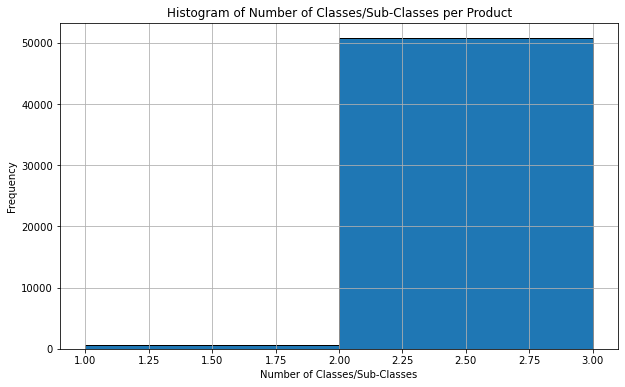

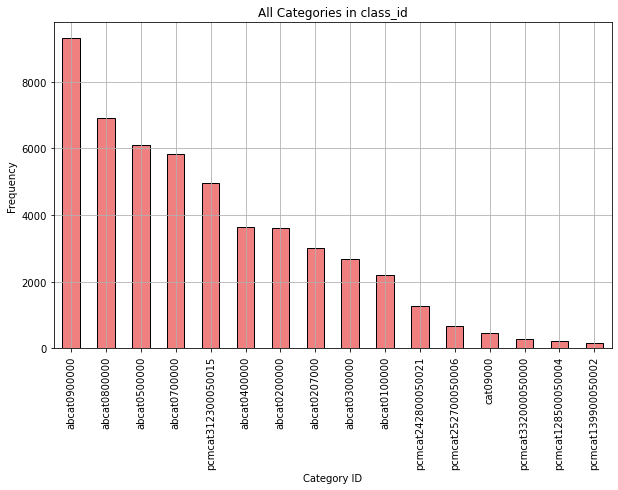

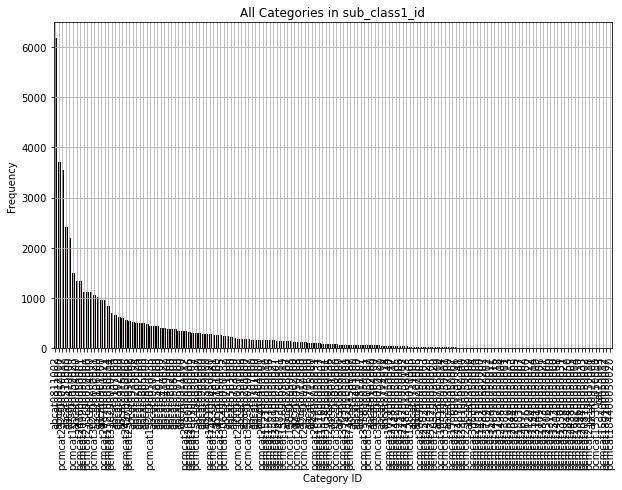

In [11]:
# Calculate the number of non-NaN classes for each row
processed_df['num_classes'] = processed_df[['class_id', 'sub_class1_id']].notna().sum(axis=1)

# Plot histogram of average number of classes
plt.figure(figsize=(10, 6))
plt.hist(processed_df['num_classes'], bins=range(1, processed_df['num_classes'].max() + 2), edgecolor='black')
plt.title('Histogram of Number of Classes/Sub-Classes per Product')
plt.xlabel('Number of Classes/Sub-Classes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histogram of all categories (no limit)
for column in ['class_id', 'sub_class1_id']:
    if processed_df[column].notna().sum() > 0:
        all_categories = processed_df[column].value_counts()
        plt.figure(figsize=(10, 6))
        all_categories.plot(kind='bar', color='lightcoral', edgecolor='black')
        plt.title(f'All Categories in {column}')
        plt.xlabel('Category ID')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

In [12]:
# Save the processed DataFrame to a CSV file
processed_df.to_csv('data/processed_products.csv', index=False)

# Display the processed DataFrame
processed_df.head()

,sku,name,description,image,type,price,shipping,manufacturer,class_id,sub_class1_id,num_classes
0,43900,Duracell - AAA Batteries (4-Pack),Compatible with select electronic devices; AAA...,http://img.bbystatic.com/BestBuy_US/images/pro...,HardGood,5.49,5.49,Duracell,pcmcat312300050015,pcmcat248700050021,2
1,48530,Duracell - AA 1.5V CopperTop Batteries (4-Pack),Long-lasting energy; DURALOCK Power Preserve t...,http://img.bbystatic.com/BestBuy_US/images/pro...,HardGood,5.49,5.49,Duracell,pcmcat312300050015,pcmcat248700050021,2
2,127687,Duracell - AA Batteries (8-Pack),Compatible with select electronic devices; AA ...,http://img.bbystatic.com/BestBuy_US/images/pro...,HardGood,7.49,5.49,Duracell,pcmcat312300050015,pcmcat248700050021,2
3,150115,Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester i...,http://img.bbystatic.com/BestBuy_US/images/pro...,HardGood,4.99,5.49,Energizer,pcmcat312300050015,pcmcat248700050021,2
4,185230,Duracell - C Batteries (4-Pack),Compatible with select electronic devices; C s...,http://img.bbystatic.com/BestBuy_US/images/pro...,HardGood,8.99,5.49,Duracell,pcmcat312300050015,pcmcat248700050021,2
